# UNIVERSIDADE SÃO JUDAS TADEU
FACULDADE DE TECNOLOGIA E CIÊNCIAS EXATAS

# Grupo

Nome: Danilo Yuudi Hirata                          RA: 819228171

Nome: Gabriel cardoso da silva                     RA: 818136132

Nome: Henrique Olo Bardeja                         RA: 81815270

Nome: Iuri Moura da Silva                          RA: 818143167

Nome: Lucas Venceslau dos Santos Soares            RA: 818221111

Nome: Wagner Alves de Melo                         RA: 818137692


## Informação de Atributos:

Lista de atributos

+ age: continuous. 
+ education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
+ race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
+ sex: Female, Male.  
+ native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [40]:
import pandas as pd
import numpy as np
from sklearn import tree
import graphviz
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
# Load dataset 

from  google.colab import files 
upload = files.upload()

df = pd.read_csv('census.csv', sep=',')
len(df)

Saving census.csv to census.csv


30162

In [45]:
# Remove invalid data from table
df = df[(df.astype(str) != ' ?').all(axis=1)]
len(df)

30162

In [46]:
df.head()

,Unnamed: 0,age,workclass,final.weight,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loos,hour.per.week,native.country,income
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [47]:
df['native.country'] = df.apply(lambda row: 1 if 'United-States' in row['native.country'] else 0, axis=1)
df = df.drop(['age','workclass','final.weight','education.num','occupation','relationship','hour.per.week','capital.loos','marital.status','capital.gain'], axis=1)
df = df.loc[:, ~df.columns.str.contains('^Unnamed',)]
df.head()

,education,race,sex,native.country,income
0,Bachelors,White,Male,1,<=50K
1,Bachelors,White,Male,1,<=50K
2,HS-grad,White,Male,1,<=50K
3,11th,Black,Male,1,<=50K
4,Bachelors,Black,Female,0,<=50K


In [48]:
df.tail()

,education,race,sex,native.country,income
30157,Assoc-acdm,White,Female,1,<=50K
30158,HS-grad,White,Male,1,>50K
30159,HS-grad,White,Female,1,<=50K
30160,HS-grad,White,Male,1,<=50K
30161,HS-grad,White,Female,1,>50K


In [49]:
# Use one-hot encoding on categorial columns
df = pd.get_dummies(df, columns=['education','race','sex', 'native.country'])
df.head()

,income,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native.country_0,native.country_1
0,<=50K,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,<=50K,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
2,<=50K,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
3,<=50K,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,<=50K,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [50]:
# Create a sample csv for prediction
df.iloc[[0]].to_csv('prediction.csv', sep=',', encoding='utf-8', index=False)

In [52]:
# shuffle rows
df = df.sample(frac=1)

# split training and testing data
d_train = df[:25000]
d_test = df[25000:]

d_train_att = d_train.drop(['income'], axis=1)
d_train_gt50 = d_train['income']

d_test_att = d_test.drop(['income'], axis=1)
d_test_gt50 = d_test['income']

d_att = df.drop(['income'], axis=1)
d_gt50 = df['income']

In [53]:
# Fit a decision tree
t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)
t = t.fit(d_train_att, d_train_gt50)

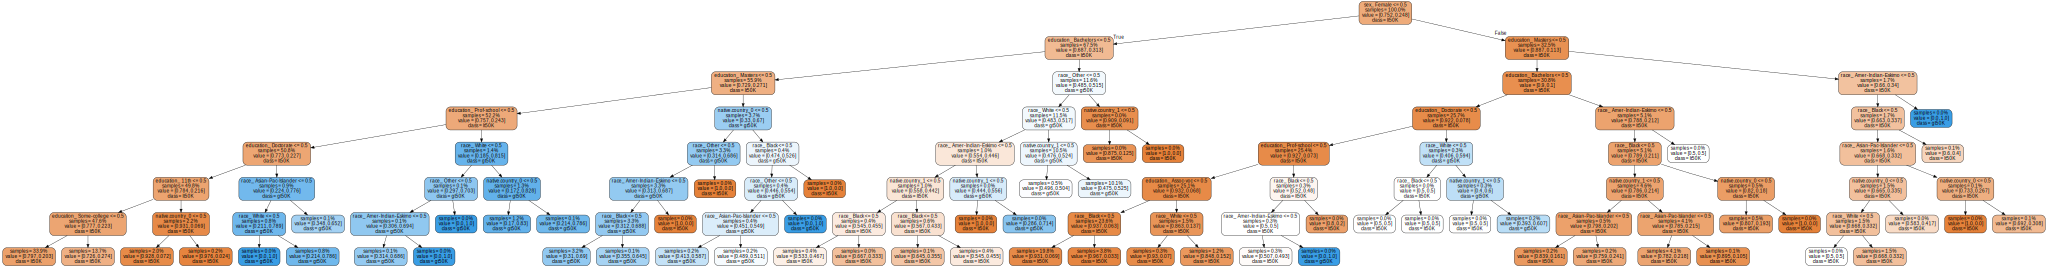

In [54]:
# Visualize tree
dot_data = tree.export_graphviz(t, out_file=None, label='all', impurity=False, proportion=True, feature_names=list(d_train_att), class_names=['lt50K', 'gt50K'], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [55]:
t.score(d_test_att, d_test_gt50)

0.7807051530414568

In [56]:
scores = cross_val_score(t, d_att, d_gt50, cv=5)
# Show avarage score and +/- two standard deviations away (covering 95% or scores)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.78 (+/- 0.00)


## Start predicting

In [57]:
sample_df = pd.read_csv('prediction.csv', sep=',')
sample_df = sample_df.drop(['income'], axis=1)

In [58]:
predict_value = sample_df.iloc[0]
y_predict = t.predict([predict_value.tolist()])
y_predict[0]

' >50K'

In [59]:
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_gt50, cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std()*2))

Max depth: 1, Accuracy: 0.75 (+/- 0.00)
Max depth: 2, Accuracy: 0.75 (+/- 0.01)
Max depth: 3, Accuracy: 0.77 (+/- 0.01)
Max depth: 4, Accuracy: 0.78 (+/- 0.00)
Max depth: 5, Accuracy: 0.78 (+/- 0.00)
Max depth: 6, Accuracy: 0.78 (+/- 0.00)
Max depth: 7, Accuracy: 0.78 (+/- 0.00)
Max depth: 8, Accuracy: 0.78 (+/- 0.00)
Max depth: 9, Accuracy: 0.78 (+/- 0.00)
Max depth: 10, Accuracy: 0.78 (+/- 0.00)
Max depth: 11, Accuracy: 0.78 (+/- 0.00)
Max depth: 12, Accuracy: 0.78 (+/- 0.00)
Max depth: 13, Accuracy: 0.78 (+/- 0.00)
Max depth: 14, Accuracy: 0.78 (+/- 0.00)
Max depth: 15, Accuracy: 0.78 (+/- 0.00)
Max depth: 16, Accuracy: 0.78 (+/- 0.00)
Max depth: 17, Accuracy: 0.78 (+/- 0.00)
Max depth: 18, Accuracy: 0.78 (+/- 0.00)
Max depth: 19, Accuracy: 0.78 (+/- 0.00)


# Regressão Logística

## Treino e Teste

**Objetivo:** Descobrir a escolaridade de homens e mulheres por etnia e cor.

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('income',axis=1),
df['income'], test_size=0.40, random_state=101)


In [63]:
x_train

,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native.country_0,native.country_1
19480,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
14872,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
26016,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
15041,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
7008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15722,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
10223,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
11108,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
29846,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1


In [64]:
y_test

7948      <=50K
20808     <=50K
12783     <=50K
7261       >50K
12909     <=50K
          ...  
14074     <=50K
17097     <=50K
12281      >50K
3251      <=50K
8964      <=50K
Name: income, Length: 12065, dtype: object

## Treinando

In [65]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs',max_iter=1000)
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predições

In [66]:
predictions = logmodel.predict(x_test)
predictions

array([' <=50K', ' <=50K', ' >50K', ..., ' >50K', ' <=50K', ' >50K'],
      dtype=object)

## Avaliação

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))



              precision    recall  f1-score   support

       <=50K       0.82      0.91      0.86      9115
        >50K       0.59      0.39      0.47      2950

    accuracy                           0.78     12065
   macro avg       0.71      0.65      0.67     12065
weighted avg       0.77      0.78      0.77     12065



In [68]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, predictions)
print(conf_mat)

[[8311  804]
 [1796 1154]]


## Conclusão

Na nossa execução utilizamos a variável target Native Country. 

Estamos realizando a comparação da acuracidade dos seguintes dados: 

+ Sex 
+ Race
+ Capital.gain 
+ Education

A partir dela obtivemos os resultados com uma Árvore de Decisão, sendo a acuracidade representada pelos valores abaixo:

+ Max depth: 1, Accuracy: 0.75 (+/- 0.00)
+ Max depth: 2, Accuracy: 0.75 (+/- 0.01)
+ Max depth: 3, Accuracy: 0.77 (+/- 0.01)
+ Max depth: 4, Accuracy: 0.78 (+/- 0.00)
+ Max depth: 5, Accuracy: 0.78 (+/- 0.00)
+ Max depth: 6, Accuracy: 0.78 (+/- 0.00)
+ Max depth: 7, Accuracy: 0.78 (+/- 0.00)
+ Max depth: 8, Accuracy: 0.78 (+/- 0.00)
+ Max depth: 9, Accuracy: 0.78 (+/- 0.00)
+ Max depth: 10, Accuracy: 0.78 (+/- 0.00)
+ Max depth: 11, Accuracy: 0.78 (+/- 0.00)
+ Max depth: 12, Accuracy: 0.78 (+/- 0.00)
+ Max depth: 13, Accuracy: 0.78 (+/- 0.00)
+ Max depth: 14, Accuracy: 0.78 (+/- 0.00)
+ Max depth: 15, Accuracy: 0.78 (+/- 0.00)
+ Max depth: 16, Accuracy: 0.78 (+/- 0.00)
+ Max depth: 17, Accuracy: 0.78 (+/- 0.00)
+ Max depth: 18, Accuracy: 0.78 (+/- 0.00)
+ Max depth: 19, Accuracy: 0.78 (+/- 0.00 )